## Distinguishing Sentiments
HW#7
Due January 8, 2018

In this exercise I utilized Python libraries - pandas, numpy, matplotlib.pyplot, tweepy, seaborn, datetime, VADER - JSON traversals, and Twitter's API to perform a sentiment analysis on the news mood based on tweets from five different news organizations - __BBC, CBS, CNN, Fox News, and New York times__.


## TO DO

* write up 3 observations
* review code and remove and redundant information/comments
* Replace display with print
* Create README.md and upload to Github

## Three observable trends based on the data below
1.
2.
3.

In [1]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import numpy as np
from IPython.display import display
from datetime import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Set up and call config document
import yaml
TWITTER_CONFIG_FILE = 'auth.yaml'

with open (TWITTER_CONFIG_FILE, 'r') as config_file:
    config = yaml.load (config_file)
#print(type(config))

In [3]:
# Twitter API Keys
access_token = config ['twitter']['access_token']
access_token_secret = config ['twitter']['access_token_secret']
consumer_key= config['twitter']['consumer_key']
consumer_secret = config ['twitter']['consumer_secret']
#print(access_token, access_token_secret, consumer_key, consumer_secret)

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
news_orgs = ("BBC", "CBS", "CNN","FoxNews","nytimes")
    
# Create arrays to hold sentiments for all news organizations
all_sentiments=[]
sentiment_means=[]

# Loop through all target news organizations
for org in news_orgs:
    
    # Reset counter for each news_org loop
    counter=1
    
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # Run search for each tweet
    public_tweets = api.search(org, count=100, result_type="recent")       
    #print(json.dumps(public_tweets["statuses"], indent=4, sort_keys=True, separators=(',',': ')))   
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate arrays above
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)  
        #print(org)
        #print (compound_list, tweets_ago)
        #print(" ")
        
        # Append all sentiments to an array
        all_sentiments.append({" Media" : org,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweets_Ago": counter
                            })  
        # Add 1 to counter    
        counter+=1
        
    # Store the Average Sentiments into the array created above
    sentiment_means.append({" Media": org,
                    "Compound_Mean": np.mean(compound_list),
                    "Positive": np.mean(positive_list),
                    "Neutral": np.mean(negative_list),
                    "Negative": np.mean(neutral_list),
                    "Count": len(compound_list)
                    })

# Convert all_sentiments to DataFrame
all_sentiments_pd = pd.DataFrame.from_dict(all_sentiments)
all_sentiments_pd.to_csv("sentiments_array_pd.csv")
display(all_sentiments_pd)
#print(all_sentiments_pd.dtypes)

# Convert sentiment_means to DataFrame 
sentiment_means_pd = pd.DataFrame.from_dict(sentiment_means) 
display(sentiment_means_pd)

,Media,Compound,Date,Negative,Neutral,Positive,Tweets_Ago
0,BBC,0.0000,Sun Jan 07 08:09:47 +0000 2018,0.000,1.000,0.000,1
1,BBC,0.7901,Sun Jan 07 08:09:47 +0000 2018,0.000,0.637,0.363,2
2,BBC,0.0000,Sun Jan 07 08:09:47 +0000 2018,0.000,1.000,0.000,3
3,BBC,0.0000,Sun Jan 07 08:09:47 +0000 2018,0.000,1.000,0.000,4
4,BBC,0.0000,Sun Jan 07 08:09:46 +0000 2018,0.000,1.000,0.000,5
5,BBC,0.0000,Sun Jan 07 08:09:46 +0000 2018,0.000,1.000,0.000,6
6,BBC,0.4215,Sun Jan 07 08:09:46 +0000 2018,0.000,0.763,0.237,7
7,BBC,0.0000,Sun Jan 07 08:09:44 +0000 2018,0.000,1.000,0.000,8
8,BBC,0.3612,Sun Jan 07 08:09:43 +0000 2018,0.000,0.762,0.238,9
9,BBC,0.3680,Sun Jan 07 08:09:43 +0000 2018,0.000,0.863,0.137,10


,Media,Compound_Mean,Count,Negative,Neutral,Positive
0,BBC,0.035210,79,0.930329,0.029861,0.039810
1,CBS,-0.007003,100,0.977810,0.014160,0.008030
2,CNN,0.046358,88,0.862239,0.057455,0.080295
3,FoxNews,0.042140,91,0.840516,0.069868,0.089582
4,nytimes,0.003892,87,0.835598,0.081253,0.083172


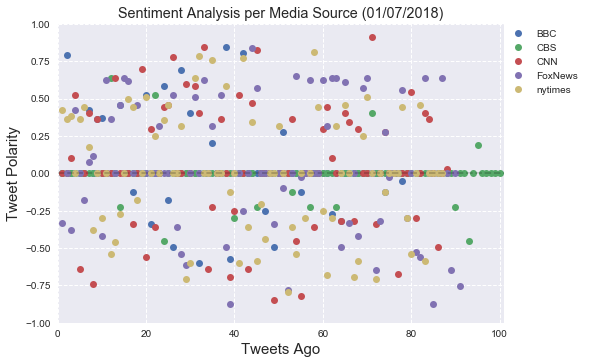

In [5]:
# Create a scatterplot
all_sentiments_pd.set_index('Tweets_Ago', inplace=True)
all_sentiments_pd.groupby(' Media')['Compound'].plot(legend=True, marker = 'o', linewidth=0)

# Customize scatterplot features
plt.style.use('ggplot')
plt.axhline(c='k', alpha=0.2, linestyle= 'dashed')
plt.axis([0,6,-1.1,1.1])
plt.xlim(0,101)
plt.ylim(-1,1)
plt.xlabel("Tweets Ago", fontsize=15)
plt.ylabel("Tweet Polarity", fontsize=15)
plt.legend(loc=(1.0, 0.75),edgecolor='black')
plt.grid(True, ls='dashed')
plt.title("Sentiment Analysis per Media Source" + " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
plt.savefig("Sentiment Analysis of Media Tweets.png",bbox_inches='tight')
plt.show()

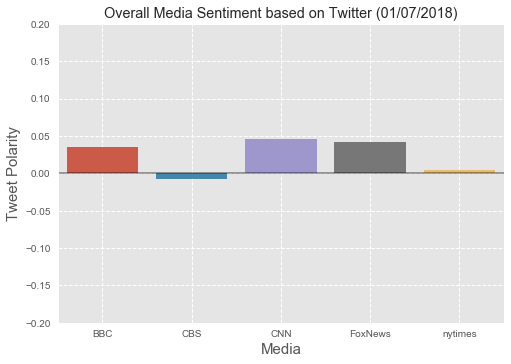

In [6]:
# Create a barplot
ax=sns.barplot(x=' Media', y='Compound_Mean', data=sentiment_means_pd)

# Customize barplot features
ax.set_xlabel('Media', fontsize=15)
ax.set_ylabel('Tweet Polarity', fontsize=15)
ax.set_title("Overall Media Sentiment based on Twitter"+ " "+ "(" + datetime.now().strftime('%m/%d/%Y') + ")")
ax.set_ylim(-0.2,0.2)
ax.grid(True, ls='dashed')
ax.hlines(0, -1, 10, colors='k', alpha=0.4)
plt.savefig("Overall Sentiment based on Twitter.png")
plt.show()